**While exploring the data I recognized that there are many duplicate images in the training set. 
I used the function phash from the package imagehash to detect them.
The following code plots some examples.
**

In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from PIL import Image
import imagehash

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


TRAIN_IMG_PATH = "../../.kaggle/competitions/whale-categorization-playground/train"

def getImageMetaData(file_path):
    with Image.open(file_path) as img:
        img_hash = imagehash.phash(img)
        return img.size, img.mode, img_hash

def get_train_input():
    train_input = pd.read_csv("../../.kaggle/competitions/whale-categorization-playground/train.csv")
    
    m = train_input.Image.apply(lambda x: getImageMetaData(TRAIN_IMG_PATH + "/" + x))
    train_input["Hash"] = [str(i[2]) for i in m]
    train_input["Shape"] = [i[0] for i in m]
    train_input["Mode"] = [str(i[1]) for i in m]
    train_input["Length"] = train_input["Shape"].apply(lambda x: x[0]*x[1])
    train_input["Ratio"] = train_input["Shape"].apply(lambda x: x[0]/x[1])
    train_input["New_Whale"] = train_input.Id == "new_whale"
    
    
    img_counts = train_input.Id.value_counts().to_dict()
    train_input["Id_Count"] = train_input.Id.apply(lambda x: img_counts[x])
    return train_input

train_input = get_train_input()


In [7]:
t = train_input.Hash.value_counts()
t = t.loc[t>1]
print("There are {} duplicate images.".format(np.sum(t)-len(t)))
t.head(20)

There are 778 duplicate images.


bb8ec43039cb663c    3
eb95e0366118cf1e    2
bccdc1b63cc8181f    2
eb9681e07ae9780e    2
b2cdd2b4e5388cc3    2
b8ce93b0aeac81b3    2
bf43d8b7a425a168    2
8fc2f535e89a230b    2
be8fc3f2b5a0a848    2
ec9a99e432f42571    2
bad3d13d4b18d582    2
ee1986a1f8075f68    2
bd0fd2d48ac286e3    2
e98e95712ec8a32e    2
ea9f81f0b4f8ac28    2
ea9e86e0b4695a1e    2
d5b12c684adad23d    2
fb94f020bd2ade03    2
9f48d7b3e094b0a5    2
bec3b02cc91e875a    2
Name: Hash, dtype: int64

Some examples:


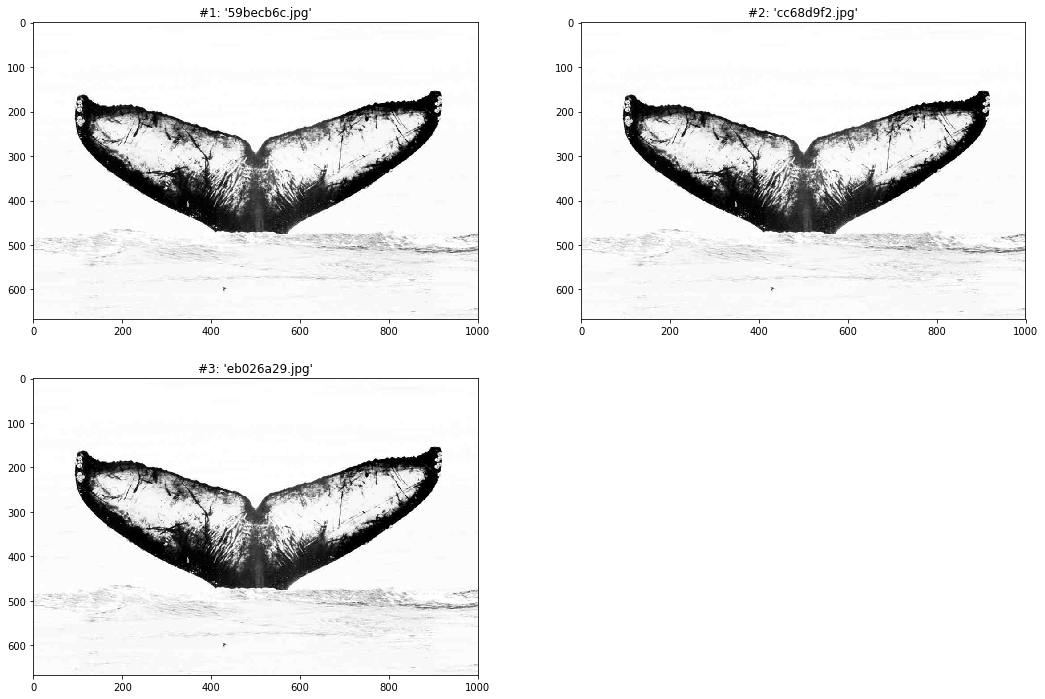

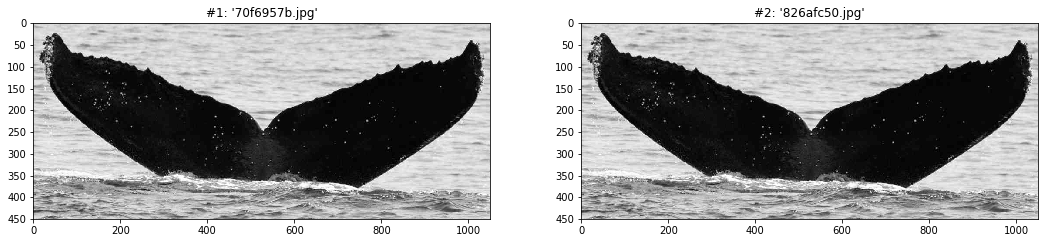

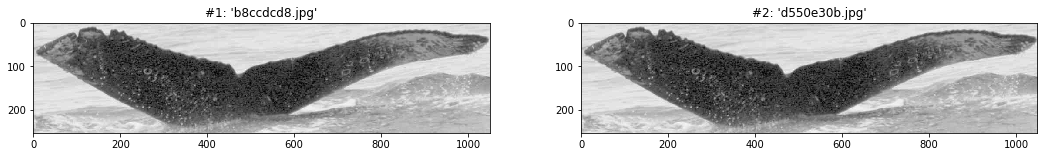

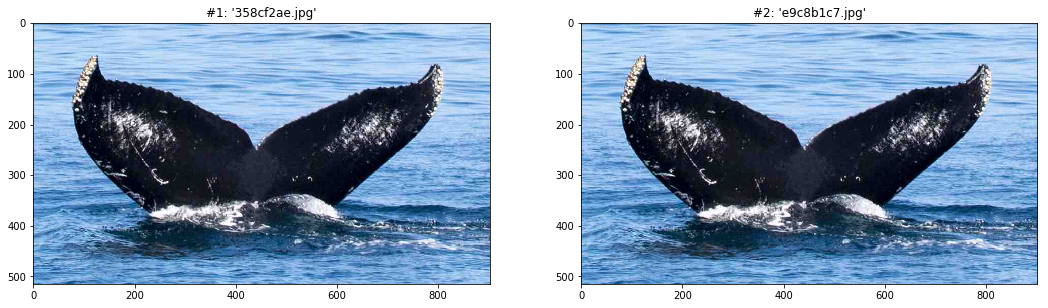

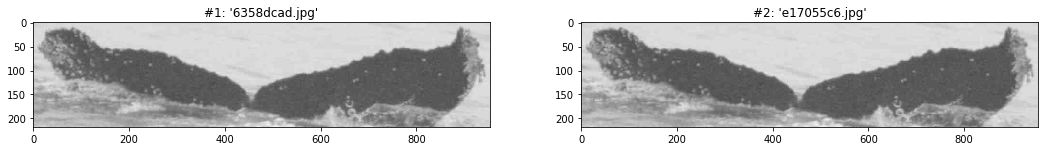

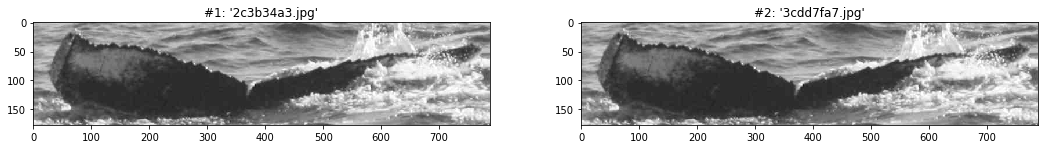

In [8]:
import collections

def plot_images(path, imgs):
    assert(isinstance(imgs, collections.Iterable))
    imgs_list = list(imgs)
    nrows = len(imgs_list)
    if (nrows % 2 != 0):
        nrows = nrows + 1 

    plt.figure(figsize=(18, 6*nrows/2))
    for i, img_file in enumerate(imgs_list):
        with Image.open(path + "/" + img_file) as img:
            ax = plt.subplot(nrows/2, 2, i+1)
            ax.set_title("#{}: '{}'".format(i+1, img_file))
            ax.imshow(img)
        
    plt.show()

print("Some examples:")
plot_images(TRAIN_IMG_PATH, train_input[train_input.Hash==t.index[0]].Image)
plot_images(TRAIN_IMG_PATH, train_input[train_input.Hash==t.index[3]].Image)
plot_images(TRAIN_IMG_PATH, train_input[train_input.Hash==t.index[8]].Image)
plot_images(TRAIN_IMG_PATH, train_input[train_input.Hash==t.index[77]].Image)
plot_images(TRAIN_IMG_PATH, train_input[train_input.Hash==t.index[431]].Image)
plot_images(TRAIN_IMG_PATH, train_input[train_input.Hash==t.index[522]].Image)
